# Cats Classifier

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, Sequential

import gc

%matplotlib inline

2023-12-11 23:18:11.771196: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-11 23:18:11.773784: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-11 23:18:11.817833: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-11 23:18:11.818874: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-11 23:18:14.584524: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
def extract_values_from_history(history):
  train_accuracy = history.history['accuracy']
  validation_accuracy = history.history['val_accuracy']

  train_loss = history.history['loss']
  validation_loss = history.history['val_loss']

  return train_accuracy, validation_accuracy, train_loss, validation_loss

def accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss):
  # Accuracy and Loss graphical representation
  plt.figure(figsize=(8, 8))

  plt.subplot(2, 1, 1)
  plt.plot(train_accuracy, label='Training Accuracy')
  plt.plot(validation_accuracy, label='Validation Accuracy')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(train_loss, label='Training Loss')
  plt.plot(validation_loss, label='Validation Loss')
  plt.ylabel('Cross Entropy')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.legend()
  plt.show()

def mean_metrics(history):
  mean_accuracy = round(np.mean(history.history["accuracy"]) * 100, 2)
  std_accuracy = round(np.std(history.history["accuracy"]) * 100, 2)
  mean_validation_accuracy = round(np.mean(history.history["val_accuracy"]) * 100, 2)
  std_validation_accuracy = round(np.std(history.history["val_accuracy"]) * 100, 2)

  mean_loss = round(np.mean(history.history["loss"]), 3)
  std_loss = round(np.std(history.history["loss"]), 3)
  mean_validation_loss = round(np.mean(history.history["loss"]), 3)
  std_validation_loss = round(np.std(history.history["loss"]), 3)

  print(f"Mean Accuracy: {mean_accuracy} +/- {std_accuracy} & Mean Validation Accuracy: {mean_validation_accuracy} +/- {std_validation_accuracy}")
  print(f"Mean Loss: {mean_loss} +/- {std_loss} & Mean Validation Loss: {mean_validation_loss} +/- {std_validation_loss}")

## 1) Reading a random picture

In [3]:
path = "data/"

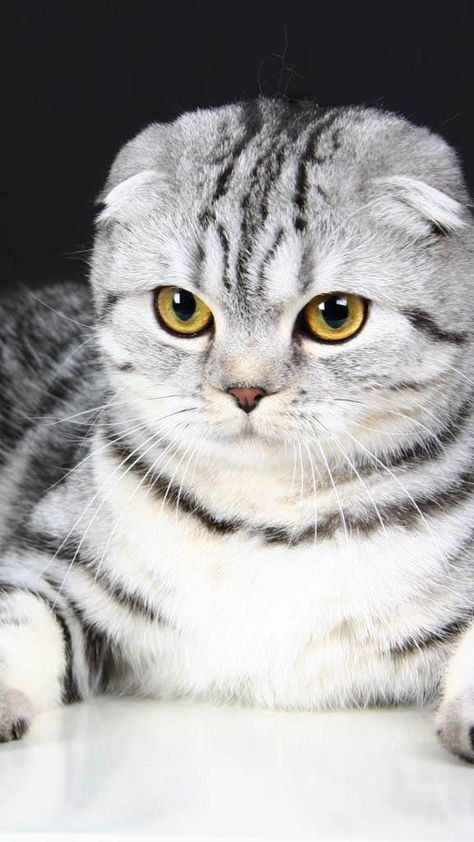

In [4]:
name = "Scottish Fold/Scottish Fold_1.jpg"
fullname = f'{path}/{name}'

# print a kitty picture
load_img(fullname)

## 2) Modelisation

### a) Preparing the data

In [5]:
img_height = 299
img_width = 299
batch_size = 20
channel = 3

In [6]:
img_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [7]:
# Creating a train set
train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    seed=42,
    class_mode="sparse",
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 5600 images belonging to 20 classes.


In [8]:
# Creating a validation set
val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    seed=42,
    class_mode="sparse",
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 1400 images belonging to 20 classes.


In [9]:
num_classes = train_set.num_classes
print(f"Number of classes : {num_classes}")

In [10]:
class_names = train_set.class_indices
print(class_names)

{'Abyssinian': 0,
 'American Bobtail': 1,
 'American Curl': 2,
 'American Shorthair': 3,
 'Bengal': 4,
 'Birman': 5,
 'Bombay': 6,
 'British Shorthair': 7,
 'Egyptian Mau': 8,
 'Exotic Shorthair': 9,
 'Maine Coon': 10,
 'Manx': 11,
 'Norwegian Forest': 12,
 'Persian': 13,
 'Ragdoll': 14,
 'Russian Blue': 15,
 'Scottish Fold': 16,
 'Siamese': 17,
 'Sphynx': 18,
 'Turkish Angora': 19}

### b) Custom CNN

In [11]:
model = keras.Sequential()
model.add(keras.Input(shape=(img_height, img_width, channel)))
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(num_classes, activation="softmax"))

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"]
)

2023-12-11 23:18:17.292226: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-11 23:18:17.327896: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 700928)            0         
                                                                 
 dense (Dense)               (None, 64)                44859456  
                                                                 
 dense_1 (Dense)             (None, 20)                1300      
                                                                 
Total params: 44861652 (171.13 MB)
Trainable params: 44861652 (171.13 MB)
Non-trainable params: 0 (0.00 Byte)
____________

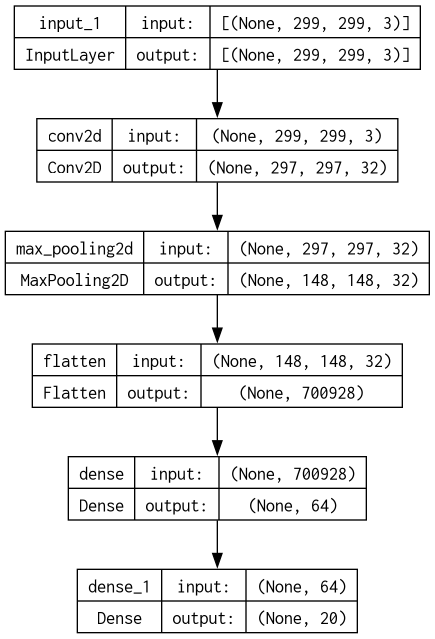

In [13]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [14]:
history = model.fit(
    train_set,
    epochs = 30,
    validation_data=val_set
)

Epoch 1/10
280/280 [==============================] - 103s 365ms/step - loss: 5.6383 - accuracy: 0.0630 - val_loss: 2.9374 - val_accuracy: 0.1007
Epoch 2/10
280/280 [==============================] - 101s 361ms/step - loss: 2.8815 - accuracy: 0.1098 - val_loss: 2.8894 - val_accuracy: 0.1179
Epoch 3/10
280/280 [==============================] - 101s 361ms/step - loss: 2.5628 - accuracy: 0.2125 - val_loss: 2.9164 - val_accuracy: 0.1607
Epoch 4/10
280/280 [==============================] - 102s 363ms/step - loss: 1.8412 - accuracy: 0.4571 - val_loss: 3.1190 - val_accuracy: 0.1514
Epoch 5/10
280/280 [==============================] - 102s 363ms/step - loss: 1.0913 - accuracy: 0.6977 - val_loss: 3.5712 - val_accuracy: 0.1507
Epoch 6/10
280/280 [==============================] - 101s 361ms/step - loss: 0.5619 - accuracy: 0.8612 - val_loss: 4.4203 - val_accuracy: 0.1521
Epoch 7/10
280/280 [==============================] - 102s 365ms/step - loss: 0.2689 - accuracy: 0.9457 - val_loss: 4.9611 -

In [15]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)

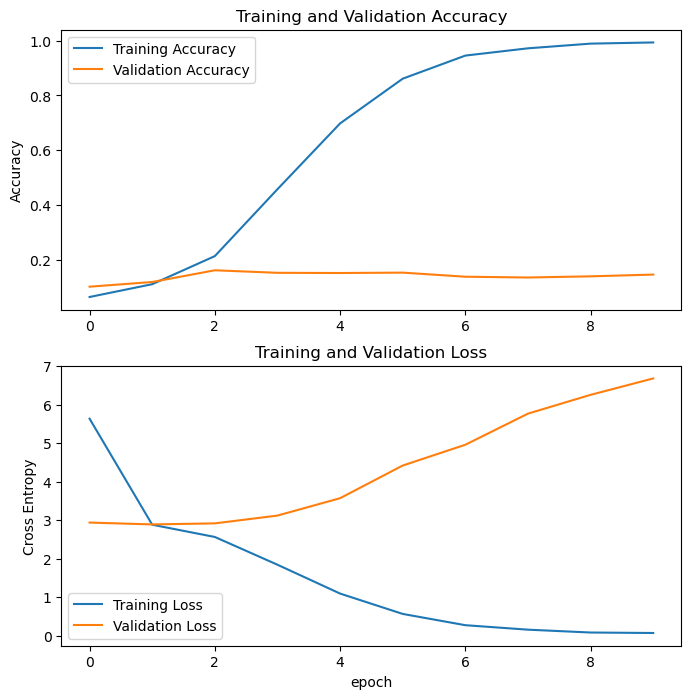

In [17]:
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [18]:
mean_metrics(history)

Mean Accuracy: 63.03 +/- 36.51 & Mean Validation Accuracy: 13.89 +/- 1.71
Mean Loss: 1.514 +/- 1.695 & Mean Validation Loss: 1.514 +/- 1.695


#### Data Augmentation

In [19]:
img_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 5600 images belonging to 20 classes.
Found 1400 images belonging to 20 classes.


In [20]:
history = model.fit(
    train_set,
    epochs = 30,
    validation_data=val_set
)

Epoch 1/10
280/280 [==============================] - 182s 651ms/step - loss: 3.0914 - accuracy: 0.0779 - val_loss: 2.9615 - val_accuracy: 0.0814
Epoch 2/10
280/280 [==============================] - 183s 652ms/step - loss: 2.9148 - accuracy: 0.1034 - val_loss: 2.9258 - val_accuracy: 0.0971
Epoch 3/10
280/280 [==============================] - 182s 652ms/step - loss: 2.8596 - accuracy: 0.1246 - val_loss: 2.8573 - val_accuracy: 0.1193
Epoch 4/10
280/280 [==============================] - 183s 652ms/step - loss: 2.8272 - accuracy: 0.1359 - val_loss: 2.8487 - val_accuracy: 0.1107
Epoch 5/10
280/280 [==============================] - 183s 654ms/step - loss: 2.7949 - accuracy: 0.1507 - val_loss: 2.8372 - val_accuracy: 0.1414
Epoch 6/10
280/280 [==============================] - 185s 661ms/step - loss: 2.7629 - accuracy: 0.1575 - val_loss: 2.8350 - val_accuracy: 0.1293
Epoch 7/10
280/280 [==============================] - 182s 648ms/step - loss: 2.7451 - accuracy: 0.1611 - val_loss: 2.8467 -

In [21]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)

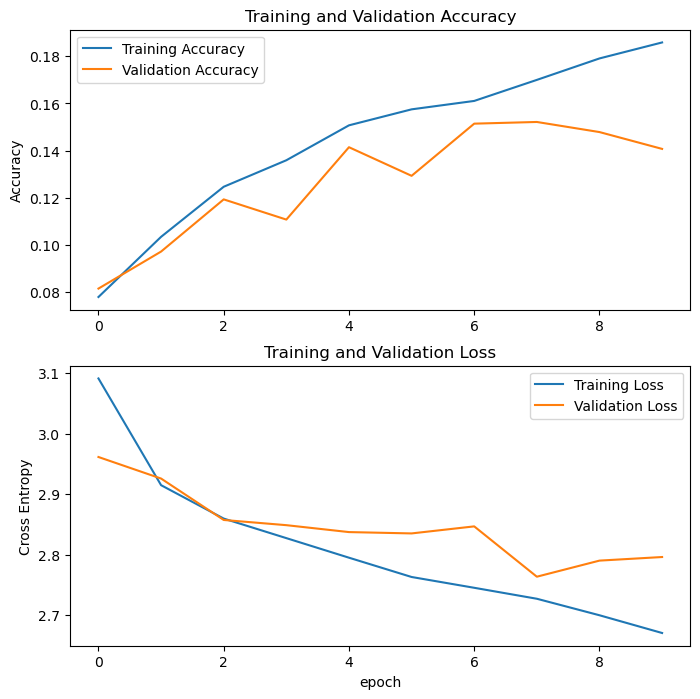

In [22]:
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [23]:
mean_metrics(history)

Mean Accuracy: 14.46 +/- 3.26 & Mean Validation Accuracy: 12.71 +/- 2.31
Mean Loss: 2.809 +/- 0.118 & Mean Validation Loss: 2.809 +/- 0.118


In [ ]:
del history
del model
del train_set
del val_set

gc.collect()

### b) Transfer Learning

#### MobileNet

- Training

In [ ]:
from tensorflow.keras.applications.MobileNetV2 import MobileNetV2
from tensorflow.keras.applications.MobileNetV2 import preprocess_input

In [ ]:
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             validation_split=0.2)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

In [ ]:
base_model = MobileNetV2(weights="imagenet",
                         input_shape=(img_height, img_width, channel))

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.sparse_categorical_crossentropy

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(train_set,
                    epochs=30,
                    validation_data=val_set)

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

- Adjusting learning rate

In [ ]:
def make_model(learning_rate=0.01):
    base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_set,
                        epochs=30,
                        validation_data=val_set)
    scores[lr] = history.history

    print()
    print()

In [ ]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

- Adding more layers

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(inner)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate =

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[size] = history.history

    print()
    print()

In [ ]:
for size, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

- Dropout & Regularization

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate =
size =

scores = {}

for drop in [0, 0.2, 0.5, 0.8]:
    print(drop)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=drop)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[drop] = history.history

    print()
    print()

In [ ]:
for drop, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % drop))
plt.legend()

In [ ]:
hist = scores[0.5]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

In [ ]:
hist = scores[0.2]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

In [ ]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

plt.legend()

- Data Augmentation

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = train_gen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

val_set = val_gen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle=batch_size
)

In [ ]:
learning_rate =
size =
drop =

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)
history = model.fit(train_set,
                    epochs=50,
                    validation_data=val_set)

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

- Training a larger model

In [ ]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size, input_size, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(input_size, input_size, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
input_size = 299

In [ ]:
img_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    target_size=(input_size, input_size),
    batch_size=batch_size
)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    target_size=(input_size, input_size),
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'mobilenet_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
)

In [ ]:
learning_rate =
size =
drop =

model = make_model(
    input_size = input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)
history = model.fit(train_set, epochs=50, validation_data=val_set,
                   callbacks=[checkpoint])

In [ ]:
del history
del model
del train_set
del val_set
del preprocess_input

gc.collect()

- VGG19

In [ ]:
from tensorflow.keras.applications.VGG19 import VGG19
from tensorflow.keras.applications.VGG19 import preprocess_input

In [ ]:
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             validation_split=0.2)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

In [ ]:
base_model = VGG19(weights="imagenet",
                         input_shape=(img_height, img_width, channel))

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.sparse_categorical_crossentropy

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(train_set,
                    epochs=30,
                    validation_data=val_set)

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

- Adjusting learning rate

In [ ]:
def make_model(learning_rate=0.01):
    base_model = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_set,
                        epochs=30,
                        validation_data=val_set)
    scores[lr] = history.history

    print()
    print()

In [ ]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

- Adding more layers

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(inner)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate =

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[size] = history.history

    print()
    print()

In [ ]:
for size, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

- Dropout & Regularization

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate =
size =

scores = {}

for drop in [0, 0.2, 0.5, 0.8]:
    print(drop)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=drop)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[drop] = history.history

    print()
    print()

In [ ]:
for drop, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % drop))
plt.legend()

In [ ]:
hist = scores[0.5]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

In [ ]:
hist = scores[0.2]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

In [ ]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

plt.legend()

- Data Augmentation

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = train_gen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

val_set = val_gen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle=batch_size
)

In [ ]:
learning_rate =
size =
drop =

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)
history = model.fit(train_set,
                    epochs=50,
                    validation_data=val_set)

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

- Training a larger model

In [ ]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size, input_size, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(input_size, input_size, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
img_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    target_size=(input_size, input_size),
    batch_size=batch_size
)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    target_size=(input_size, input_size),
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'vgg19_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
)

In [ ]:
learning_rate =
size =
drop =

model = make_model(
    input_size = input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)
history = model.fit(train_set, epochs=50, validation_data=val_set,
                   callbacks=[checkpoint])

In [ ]:
del history
del model
del train_set
del val_set
del preprocess_input

gc.collect()

- Xception

In [ ]:
from tensorflow.keras.applications.Xception import Xception
from tensorflow.keras.applications.Xception import preprocess_input

In [ ]:
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             validation_split=0.2)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

In [ ]:
base_model = Xception(weights="imagenet",
                         input_shape=(img_height, img_width, channel))

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.sparse_categorical_crossentropy

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(train_set,
                    epochs=30,
                    validation_data=val_set)

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

- Adjusting learning rate

In [ ]:
def make_model(learning_rate=0.01):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_set,
                        epochs=30,
                        validation_data=val_set)
    scores[lr] = history.history

    print()
    print()

In [ ]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

- Adding more layers

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(inner)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate =

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[size] = history.history

    print()
    print()

In [ ]:
for size, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

- Dropout & Regularization

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate =
size =

scores = {}

for drop in [0, 0.2, 0.5, 0.8]:
    print(drop)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=drop)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[drop] = history.history

    print()
    print()

In [ ]:
for drop, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % drop))
plt.legend()

In [ ]:
hist = scores[0.5]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

In [ ]:
hist = scores[0.2]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

In [ ]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

plt.legend()

- Data augmentation

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = train_gen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

val_set = val_gen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle=batch_size
)

In [ ]:
learning_rate =
size =
drop =

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)
history = model.fit(train_set,
                    epochs=50,
                    validation_data=val_set)

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

- Training a larger model

In [ ]:
def make_model(input_size=299, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size, input_size, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(input_size, input_size, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
img_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    target_size=(input_size, input_size),
    batch_size=batch_size
)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    target_size=(input_size, input_size),
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
)

In [ ]:
learning_rate =
size =
drop =

model = make_model(
    input_size = input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)
history = model.fit(train_set, epochs=50, validation_data=val_set,
                   callbacks=[checkpoint])

In [ ]:
del history
del model
del train_set
del val_set
del preprocess_input

gc.collect()

- EfficientNet

In [ ]:
from tensorflow.keras.applications.EfficientBNet7 import EfficientBNet7
from tensorflow.keras.applications.EfficientBNet7 import preprocess_input

In [ ]:
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             validation_split=0.2)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

In [ ]:
base_model = EfficientBNet7(weights="imagenet",
                         input_shape=(img_height, img_width, channel))

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.sparse_categorical_crossentropy

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(train_set,
                    epochs=30,
                    validation_data=val_set)

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

- Adjusting learning rate

In [ ]:
def make_model(learning_rate=0.01):
    base_model = EfficientBNet7(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_set,
                        epochs=30,
                        validation_data=val_set)
    scores[lr] = history.history

    print()
    print()

In [ ]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

- Adding more layers

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = EfficientBNet7(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(inner)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate =

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[size] = history.history

    print()
    print()

In [ ]:
for size, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

- Dropout & Regularization

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = EfficientBNet7(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate =
size =

scores = {}

for drop in [0, 0.2, 0.5, 0.8]:
    print(drop)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=drop)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[drop] = history.history

    print()
    print()

In [ ]:
for drop, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % drop))
plt.legend()

In [ ]:
hist = scores[0.5]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

In [ ]:
hist = scores[0.2]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

In [ ]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

plt.legend()

- Data augmentation

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = train_gen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

val_set = val_gen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle=batch_size
)

In [ ]:
learning_rate =
size =
drop =

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)
history = model.fit(train_set,
                    epochs=50,
                    validation_data=val_set)

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

- Training a larger model

In [ ]:
def make_model(input_size=299, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = EfficientBNet7(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size, input_size, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(input_size, input_size, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
img_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    target_size=(input_size, input_size),
    batch_size=batch_size
)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    target_size=(input_size, input_size),
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'efficientBnet7_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
)

In [ ]:
learning_rate =
size =
drop =

model = make_model(
    input_size = input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)
history = model.fit(train_set, epochs=50, validation_data=val_set,
                   callbacks=[checkpoint])

**General**:
- [Introduction to Dropout for Regularization](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/)
- [How Do Convolutional Layers Work?](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)

**Optimizer and Loss Functions for multiclasses classification:**

- [Adam Optimizer for multiclasses classification](https://towardsdatascience.com/multiclass-classification-neural-network-using-adam-optimizer-fb9a4d2f73f4)
- [Understanding Loss functions for classification](https://medium.com/mlearning-ai/understanding-loss-functions-for-classification-81c19ee72c2a)

**Transfer Learning**:
- [MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications](https://arxiv.org/abs/1704.04861)
- [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)
- [Xception: Deep Learning with Depthwise Separable Convolutions](https://arxiv.org/abs/1610.02357)
- [EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks](https://arxiv.org/abs/1905.11946)